<h1 style='text-align:center'>Titanic.</h1>
<br>

**Titanic** is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the **Titanic** sank after colliding with an iceberg, killing *1502* out of *2224* passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.<br><br>

**What particularly we need do in this challenge ?**

In this challenge, we need to complete the analysis of what sorts of people were likely to survive. In particular,  we apply the tools of machine learning to predict which passengers survived the tragedy?.


### Importing the data

In [206]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#import train and test data.
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
name=train.Name
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<h3>What does this data set mean.</h3>
____

The data has been split into two groups:
- training set (train.csv)
- test set(test.csv)
<br>

The training set includes passengers survival status(also know as the ground truth from the titanic tragedy) which along with other features like gender, class, fare and pclass is used to create machine learning model.
<br><br>
The test set should be used to see how well my model performs on unseen data. The test set does not provide passengers survival status. We are going to use our model to predict passenger survival status.
<br><br>

Lets describe whats the meaning of the features given the both train & test datasets.
<h4>Variable Definition Key.</h4>
- Survival
 - 0= No
 - 1= Yes
- pclass (Ticket class)
 - 1=1st
 - 2=2nd
 - 3=3rd
 
- sex
<br>

- age


- sibsp (# of siblings / spouses aboard the Titanic)
<br>
- parch (# of parents / children aboard the Titanic)
<br>
- tickets
<br>
- fare
<br>
- cabin
- embarked Port of Embarkation.
 - C = Cherbourg,
 - Q = Queenstown,
 - S = Southampton
- pclass: A proxy for socio-economic status (SES)
<br>
<h4>This is important to remember and will come in handy for later analysis.</h4>
 - 1st = Upper
 - 2nd = Middle
 - 3rd = Lower





## Part 1. Cleaning the data.

In [207]:
## Lets againgtake a quick glance of what we are dealing with.
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


It looks like this dataset is quite organized, however, before using this dataset for analyzing and visualizing we need to deal with ..
- Different variables
- Null values

## Different variables present in the datasets.
 - **There are four type of variables**
  - **Numerical Features**: Age, Fare, SibSp and Parch
  - **Categorical Features**: Sex, Embarked, Survived and Pclass
  - **Alphanumeric Features**: Ticket and Cabin(Contains both alphabets and the numeric value)
  - **Text Features**: Name

** We really need to tweak these features so we get the desired form of input data**

In [208]:
train.shape# Means 891 rows and 12 columns.

(891, 12)

In [209]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We see Age  and Cabin have a lot of missing value.So First we need to deal with all these NaN values.
- As in Cabin column about 1\3rd of the values are missing.So we get rid of this column. 
<br>

## Why missing values treatment is required?
Missing data in the training data set can reduce the power / fit of a model or can lead to a biased model because we have not analysed the behavior and relationship with other variables correctly. It can lead to wrong prediction or classification.
- Here the methods to deal with missing values.

### KNN Imputation. 
------
In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing.

For more...
<br>
**Method 1**
- [KNN Imputation](https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/)
- [Blog](https://towardsdatascience.com/the-use-of-knn-for-missing-values-cf33d935c637)

**Method 2**
- [sklearn.preprocessing.Imputer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html)


**We use the Method 2 i.e(sklearn.preprocessing.Imputer)**

Just because it is easy to use....


In [210]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="median")
new = imp.fit_transform(train[['Age']])
train['Age2'] = new
new=imp.fit_transform(train.Age.values.reshape(1,-1))
imp.fit_transform(train[['Age']])
#Lets drop the old one age Column.


C:\Users\Aritra Kundu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: [  5  17  19  26  28  29  31  32  36  42  45  46  47  48  55  64  65  76
  77  82  87  95 101 107 109 121 126 128 140 154 158 159 166 168 176 180
 181 185 186 196 198 201 214 223 229 235 240 241 250 256 260 264 270 274
 277 284 295 298 300 301 303 304 306 324 330 334 335 347 351 354 358 359
 364 367 368 375 384 388 409 410 411 413 415 420 425 428 431 444 451 454
 457 459 464 466 468 470 475 481 485 490 495 497 502 507 511 517 522 524
 527 531 533 538 547 552 557 560 563 564 568 573 578 584 589 593 596 598
 601 602 611 612 613 629 633 639 643 648 650 653 656 667 669 674 680 692
 697 709 711 718 727 732 738 739 740 760 766 768 773 776 778 783 790 792
 793 815 825 826 828 832 837 839 846 849 859 863 868 878 888]. At least one non-missing value is needed for 

array([[22.  ],
       [38.  ],
       [26.  ],
       [35.  ],
       [35.  ],
       [28.  ],
       [54.  ],
       [ 2.  ],
       [27.  ],
       [14.  ],
       [ 4.  ],
       [58.  ],
       [20.  ],
       [39.  ],
       [14.  ],
       [55.  ],
       [ 2.  ],
       [28.  ],
       [31.  ],
       [28.  ],
       [35.  ],
       [34.  ],
       [15.  ],
       [28.  ],
       [ 8.  ],
       [38.  ],
       [28.  ],
       [19.  ],
       [28.  ],
       [28.  ],
       [40.  ],
       [28.  ],
       [28.  ],
       [66.  ],
       [28.  ],
       [42.  ],
       [28.  ],
       [21.  ],
       [18.  ],
       [14.  ],
       [40.  ],
       [27.  ],
       [28.  ],
       [ 3.  ],
       [19.  ],
       [28.  ],
       [28.  ],
       [28.  ],
       [28.  ],
       [18.  ],
       [ 7.  ],
       [21.  ],
       [49.  ],
       [29.  ],
       [65.  ],
       [28.  ],
       [21.  ],
       [28.5 ],
       [ 5.  ],
       [11.  ],
       [22.  ],
       [38.  ],
       [

In [211]:
train.drop('Age',axis=1,inplace=True)


In [212]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Age2             0
dtype: int64

In [213]:
train.set_index('PassengerId',inplace=True)
## get dummy variables for Column sex and embarked since they are categorical value.
train = pd.get_dummies(train, columns=["Sex"], drop_first=True)
train = pd.get_dummies(train, columns=["Embarked"],drop_first=True)


#Mapping the data.
train['Fare'] = train['Fare'].astype(int)
train.loc[train.Fare<=7.91,'Fare']=0
train.loc[(train.Fare>7.91) &(train.Fare<=14.454),'Fare']=1
train.loc[(train.Fare>14.454)&(train.Fare<=31),'Fare']=2
train.loc[(train.Fare>31),'Fare']=3

train['Age2']=train['Age2'].astype(int)
train.loc[ train['Age2'] <= 16, 'Age2']= 0
train.loc[(train['Age2'] > 16) & (train['Age2'] <= 32), 'Age2'] = 1
train.loc[(train['Age2'] > 32) & (train['Age2'] <= 48), 'Age2'] = 2
train.loc[(train['Age2'] > 48) & (train['Age2'] <= 64), 'Age2'] = 3
train.loc[train['Age2'] > 64, 'Age2'] = 4

In [214]:
# In our data the Ticket and Cabin,Name are the base less,leds to the false prediction so Drop both of them.
train.drop(['Ticket','Cabin','Name'],axis=1,inplace=True,  errors='ignore')
train.head()
print(type(train.Age2))

<class 'pandas.core.series.Series'>


In [215]:
train.shape
# 891 rows and 9 columns.

(891, 9)

In [216]:
train.Survived.value_counts()/len(train)*100
#This signifies almost 61% people in the ship died and 38% survived.

Survived
0    61.616162
1    38.383838
Name: count, dtype: float64

In [217]:
train.describe()

,Survived,Pclass,SibSp,Parch,Fare,Age2
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.523008,0.381594,1.453423,1.288440
std,0.486592,0.836071,1.102743,0.806057,1.124206,0.812038
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,3.000000,0.000000,0.000000,1.000000,1.000000
75%,1.000000,3.000000,1.000000,0.000000,2.000000,2.000000
max,1.000000,3.000000,8.000000,6.000000,3.000000,4.000000


In [218]:
train.groupby('Survived').mean()

,Pclass,SibSp,Parch,Fare,Age2,Sex_male,Embarked_Q,Embarked_S
Survived,,,,,,,,
0,2.531876,0.553734,0.329690,1.185792,1.31694,0.852459,0.085610,0.777778
1,1.950292,0.473684,0.464912,1.883041,1.24269,0.318713,0.087719,0.634503


In [219]:
train.groupby('Sex_male').mean()

,Survived,Pclass,SibSp,Parch,Fare,Age2,Embarked_Q,Embarked_S
Sex_male,,,,,,,,
False,0.742038,2.159236,0.694268,0.649682,1.815287,1.210191,0.114650,0.646497
True,0.188908,2.389948,0.429809,0.235702,1.256499,1.331023,0.071057,0.764298


There are a couple of points that should be noted from the statistical overview. They are..
- About the survival rate, only 38% passenger survived during that tragedy.
- About the survival rate for genders, 74% female passengers survived, while only 19% male passengers survived.

**Correlation Matrix and Heatmap**

In [256]:
train.corr()

,Survived,Pclass,SibSp,Parch,Fare,Age2,Sex_male,Embarked_Q,Embarked_S
Survived,1.000000,-0.338481,-0.035322,0.081629,0.301792,-0.044492,-0.543351,0.003650,-0.155660
Pclass,-0.338481,1.000000,0.083081,0.018443,-0.660699,-0.358005,0.131900,0.221009,0.081720
SibSp,-0.035322,0.083081,1.000000,0.414838,0.365893,-0.218846,-0.114631,-0.026354,0.070941
Parch,0.081629,0.018443,0.414838,1.000000,0.363097,-0.134014,-0.245489,-0.081228,0.063036
Fare,0.301792,-0.660699,0.365893,0.363097,1.000000,0.113812,-0.237585,-0.227213,-0.035715
Age2,-0.044492,-0.358005,-0.218846,-0.134014,0.113812,1.000000,0.071125,-0.079779,0.016203
Sex_male,-0.543351,0.131900,-0.114631,-0.245489,-0.237585,0.071125,1.000000,-0.074115,0.125722
Embarked_Q,0.003650,0.221009,-0.026354,-0.081228,-0.227213,-0.079779,-0.074115,1.000000,-0.496624
Embarked_S,-0.155660,0.081720,0.070941,0.063036,-0.035715,0.016203,0.125722,-0.496624,1.000000


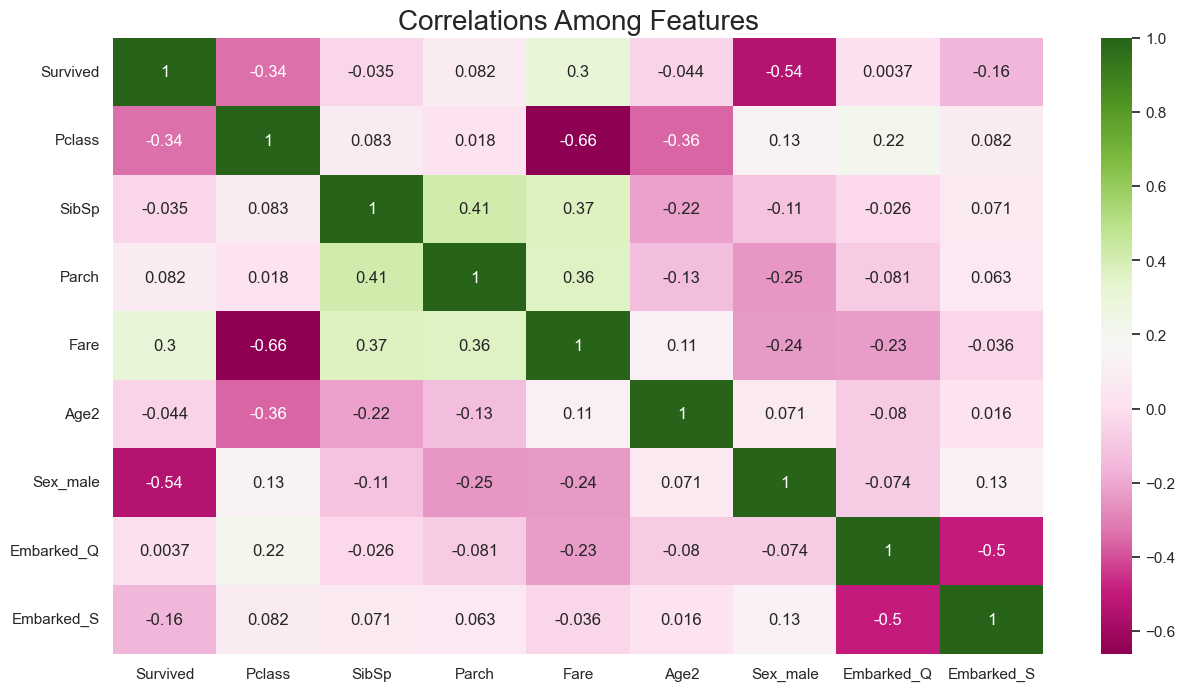

In [221]:
plt.subplots(figsize = (15,8))
sns.heatmap(train.corr(), annot=True,cmap="PiYG")
plt.title("Correlations Among Features", fontsize = 20);

**Positive Correlation Features:**
- Fare and Survived: 0.26.

There is a positive correlation between Fare and Survived rated. This can be explained by saying that, the passenger who paid more money for their ticket were more likely to survive. 

**Negative Correlation Features:**
- Fare and Pclass: -0.55
 - This relationship can be explained by saying that first class passenger(1) paid more for fare then second class passenger(2), similarly second class passenger paid more than the third class passenger(3). 
- Gender and Survived: -0.54
 - Basically is the info of whether the passenger was male or female.
- Pclass and Survived: -0.34

**Gender and Survived**


([<matplotlib.axis.XTick at 0x1cf76ab8290>,
 [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

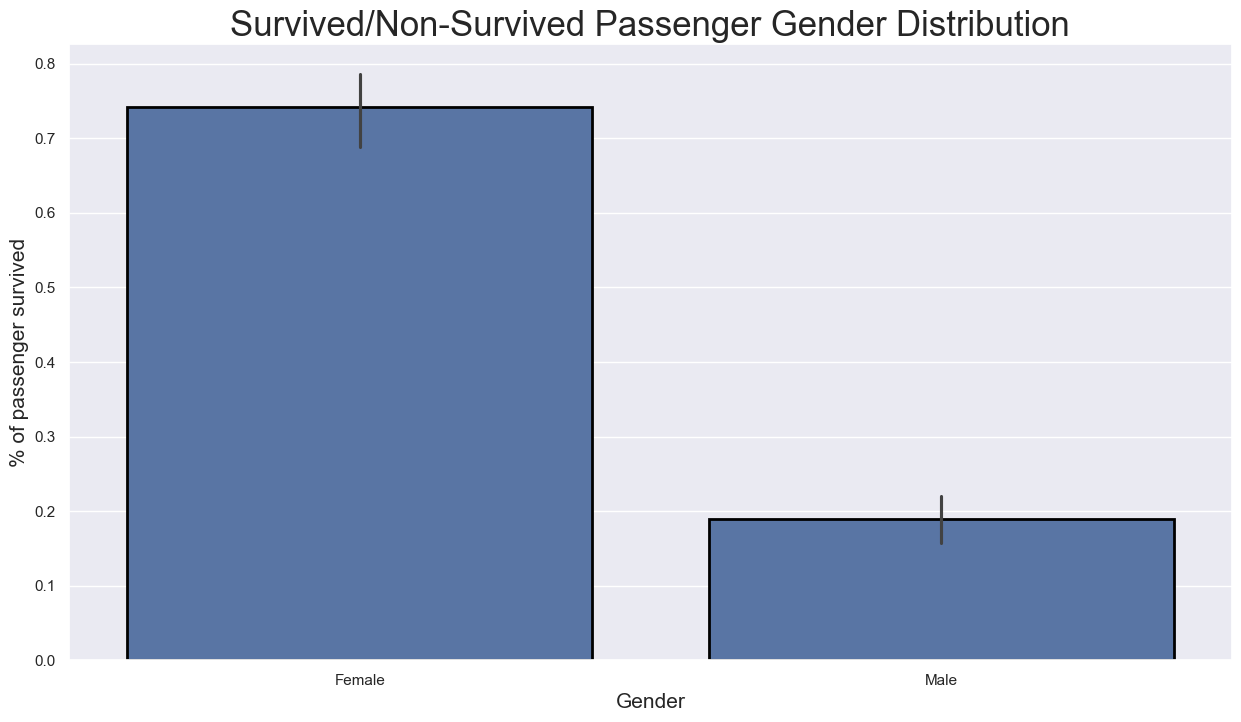

In [222]:
train['Sex_male'] = train['Sex_male'].astype(int)

plt.subplots(figsize=(15,8))
sns.barplot(x="Sex_male", y="Survived", data=train, edgecolor=(0,0,0), linewidth=2)
plt.title("Survived/Non-Survived Passenger Gender Distribution", fontsize=25)
labels = ['Female', 'Male']
plt.ylabel("% of passenger survived", fontsize=15)
plt.xlabel("Gender", fontsize=15)
plt.xticks([0, 1], labels)   # 0 = Female, 1 = Male

# 1 is for male and 0 is for female.

This bar plot above shows the distribution of female and male survived. The x_label shows gender and the y_label shows % of passenger survived. This bar plot shows that 74% female passenger survived while only ~19% male passenger survived.

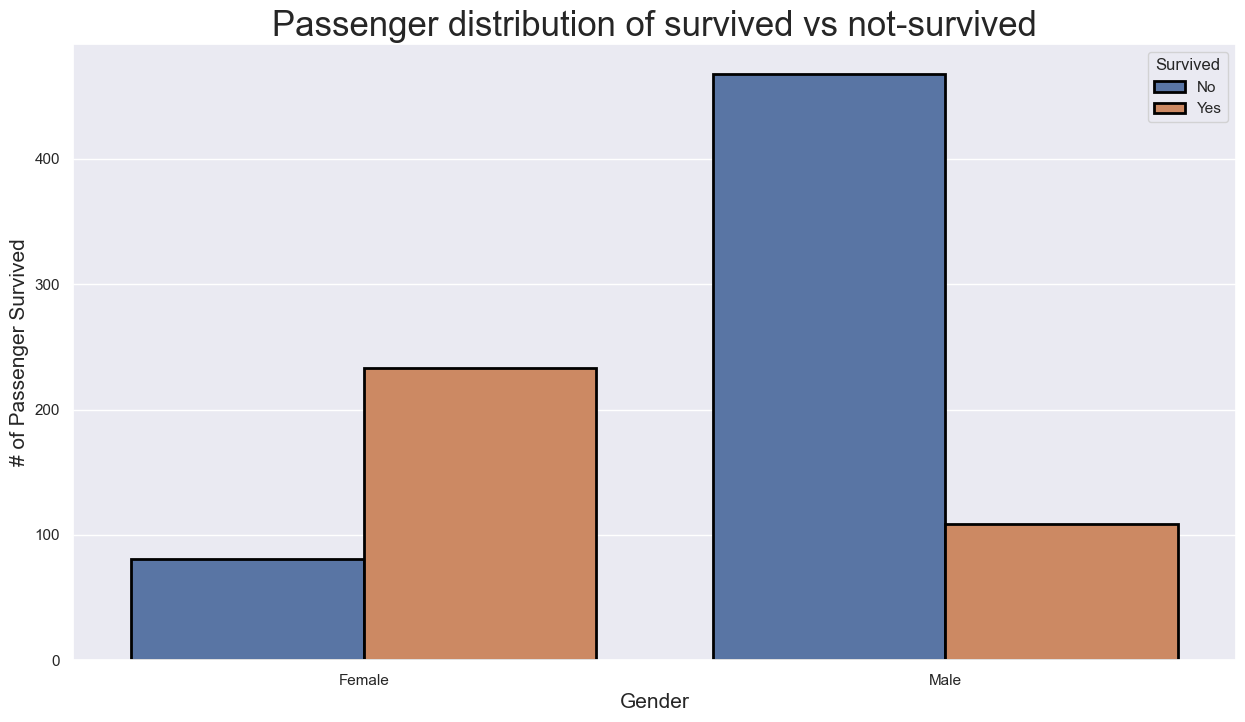

In [223]:
sns.set(style='darkgrid')
plt.subplots(figsize = (15,8))
ax=sns.countplot(x='Sex_male',data=train,hue='Survived',edgecolor=(0,0,0),linewidth=2)
train.shape
## Fixing title, xlabel and ylabel
plt.title('Passenger distribution of survived vs not-survived',fontsize=25)
plt.xlabel('Gender',fontsize=15)
plt.ylabel("# of Passenger Survived", fontsize = 15)
labels = ['Female', 'Male']
#Fixing xticks.
plt.xticks(sorted(train.Survived.unique()),labels)
## Fixing legends
leg = ax.get_legend()
leg.set_title('Survived')
legs=leg.texts
legs[0].set_text('No')
legs[1].set_text('Yes')


This count plot shows the actual distribution of male and female passengers that survived and did not survive. It shows that among all the females ~ 230 survived and ~ 70 did not survive. While among male passengers ~110 survived and ~480 did not survive.

**Summary**
- As we suspected, female passengers have survived at a much better rate than male passengers.
- It seems about right since females and children were the priority.

**Pclass and Survived**

In [224]:
train.head(4)

,Survived,Pclass,SibSp,Parch,Fare,Age2,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,0,3,1,0,0,1,1,False,True
2,1,1,1,0,3,2,0,False,False
3,1,3,0,0,0,1,0,False,True
4,1,1,1,0,3,2,0,False,True


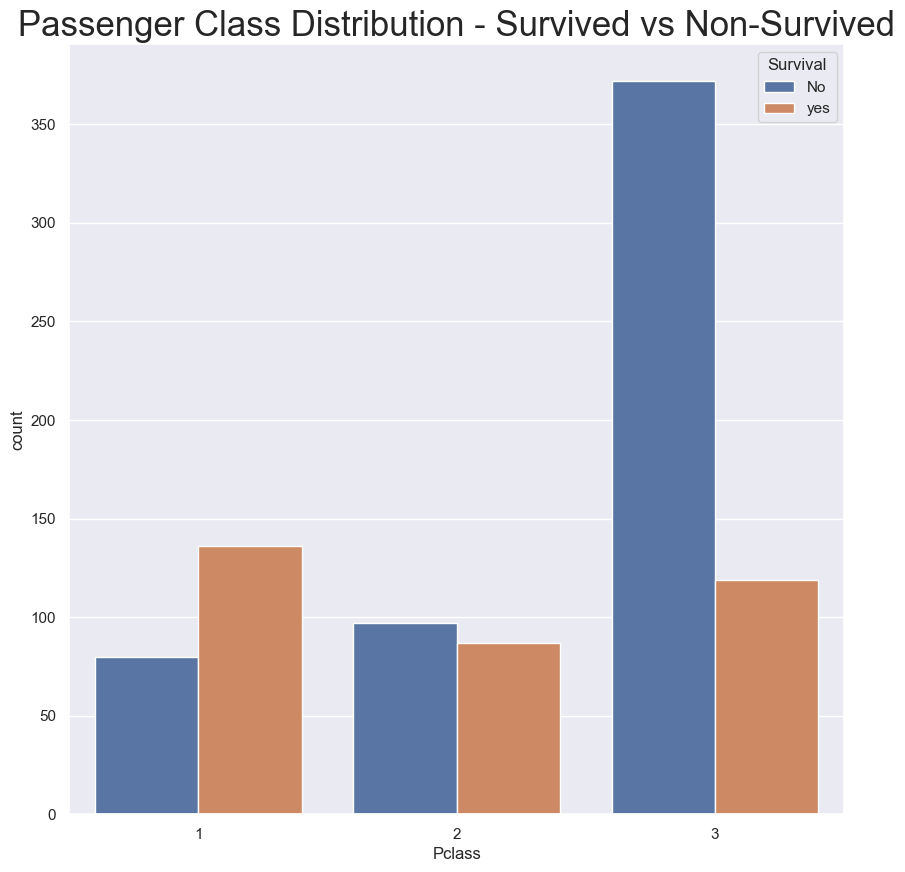

In [225]:
plt.subplots(figsize = (10,10))
ax=sns.countplot(x='Pclass',hue='Survived',data=train)
plt.title("Passenger Class Distribution - Survived vs Non-Survived", fontsize = 25)
leg=ax.get_legend()
leg.set_title('Survival')
legs=leg.texts

legs[0].set_text('No')
legs[1].set_text("yes")

So it clearly seems that,The survival of the people belong to 3rd class is very least.
It looks like ...
-  63% first class passenger survived titanic tragedy, while
-  48% second class and
-  only 24% third class passenger survived.

C:\Users\Aritra Kundu\AppData\Local\Temp\ipykernel_25212\938228420.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train.loc[(train['Survived'] == 0),'Pclass'],shade=True,color='r',label='Not Survived')
C:\Users\Aritra Kundu\AppData\Local\Temp\ipykernel_25212\938228420.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Pclass'],shade=True,color='b',label='Survived' )


([<matplotlib.axis.XTick at 0x1cf76c58150>,
 [Text(1, 0, 'First'), Text(2, 0, 'Second'), Text(3, 0, 'Third')])

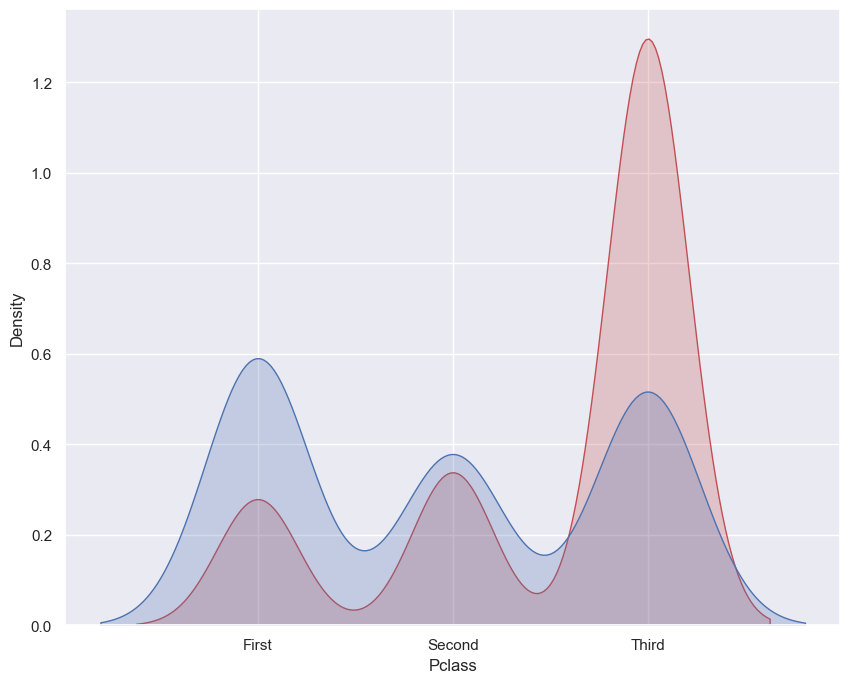

In [226]:
plt.subplots(figsize=(10,8))
sns.kdeplot(train.loc[(train['Survived'] == 0),'Pclass'],shade=True,color='r',label='Not Survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Pclass'],shade=True,color='b',label='Survived' )

labels = ['First', 'Second', 'Third']
plt.xticks(sorted(train.Pclass.unique()),labels)

This kde plot is pretty self explanatory with all the labels and colors. Something I have noticed that some readers might find questionable is that in, the plot; the third class passengers have survived more than second class passnegers. It is true since there were a lot more third class passengers than first and second.



**Summary**

First class passenger had the upper hand during the tragedy than second and third class passengers. You can probably agree with me more on this, when we look at the distribution of ticket fare and survived column.

**Fare and Survived**

C:\Users\Aritra Kundu\AppData\Local\Temp\ipykernel_25212\2608193397.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(train.loc[(train['Survived'] == 0),'Fare'],color='r',shade=True,label='Not Survived')
C:\Users\Aritra Kundu\AppData\Local\Temp\ipykernel_25212\2608193397.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Fare'],color='b',shade=True,label='Survived' )


Text(0.5, 0, 'Fare')

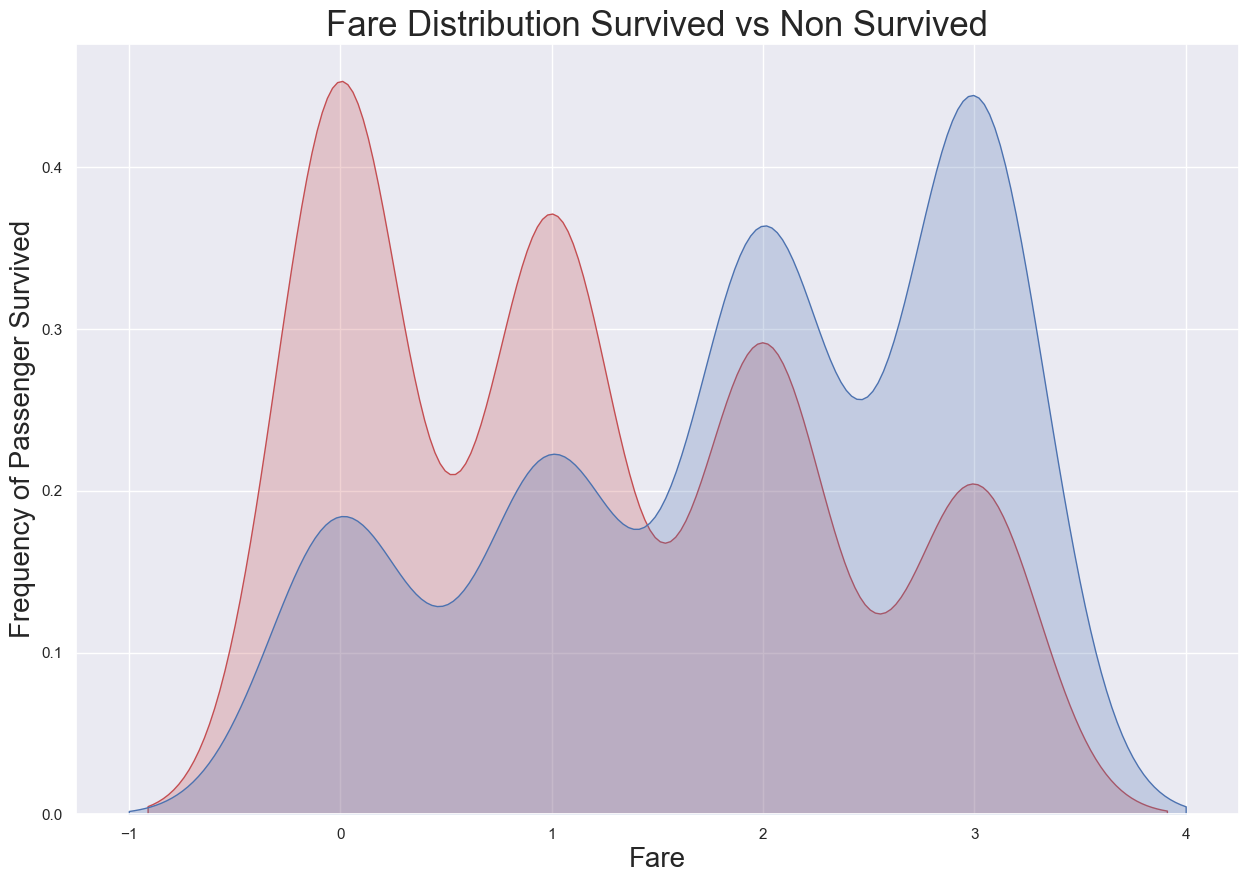

In [227]:
plt.subplots(figsize=(15,10))

ax=sns.kdeplot(train.loc[(train['Survived'] == 0),'Fare'],color='r',shade=True,label='Not Survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Fare'],color='b',shade=True,label='Survived' )
plt.title('Fare Distribution Survived vs Non Survived',fontsize=25)
plt.ylabel('Frequency of Passenger Survived',fontsize=20)
plt.xlabel('Fare',fontsize=20)

**Age and Survived**

C:\Users\Aritra Kundu\AppData\Local\Temp\ipykernel_25212\1727546115.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train.loc[(train['Survived']==0),'Age2'],color='r',shade=True,label='Not Survived')
C:\Users\Aritra Kundu\AppData\Local\Temp\ipykernel_25212\1727546115.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train.loc[(train['Survived']==1),'Age2'],color='b',shade=True,label='Survived')


<Axes: xlabel='Age2', ylabel='Density'>

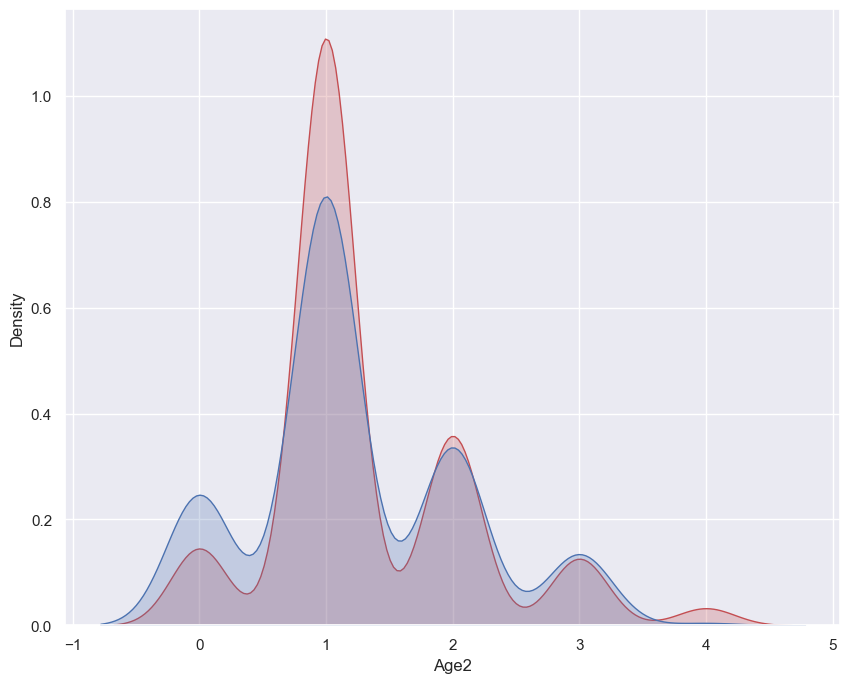

In [228]:
#fig,axs=plt.subplots(nrows=2)
fig,axs=plt.subplots(figsize=(10,8))
sns.set_style(style='darkgrid')
sns.kdeplot(train.loc[(train['Survived']==0),'Age2'],color='r',shade=True,label='Not Survived')
sns.kdeplot(train.loc[(train['Survived']==1),'Age2'],color='b',shade=True,label='Survived')


There is nothing out of the ordinary of about this plot, except the very left part of the distribution. It shows that

children and infants were the priority.

**Modeling the Data**

I will train the data with the following models:
- Logistic Regression
- Gaussian Naive Bayes
- Support Vector Machines
- Decision Tree Classifier
- K-Nearest Neighbors(KNN)
 -  and many other.....

In [229]:
X=train.drop('Survived',axis=1)
y=train['Survived'].astype(int)


<h2>Classifier Comparision</h2>

By Classifier Comparison we choose which model best for the given data.

In [230]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis 
from xgboost import XGBClassifier

classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    XGBClassifier(),
    RandomForestClassifier(n_estimators=100, max_features=3),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()]
    


log_cols = ["Classifier", "Accuracy"]
log= pd.DataFrame(columns=log_cols)


In [231]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
acc_dict = {}

for train_index, test_index in sss.split(X, y):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    for clf in classifiers:
        name = clf.__class__.__name__
    
        clf.fit(X_train,y_train)
        predict=clf.predict(X_test)
        acc=accuracy_score(y_test,predict)
        if name in acc_dict:
            acc_dict[name]+=acc
        else:
            acc_dict[name]=acc

Text(0.5, 1.0, 'Classifier Accuracy')

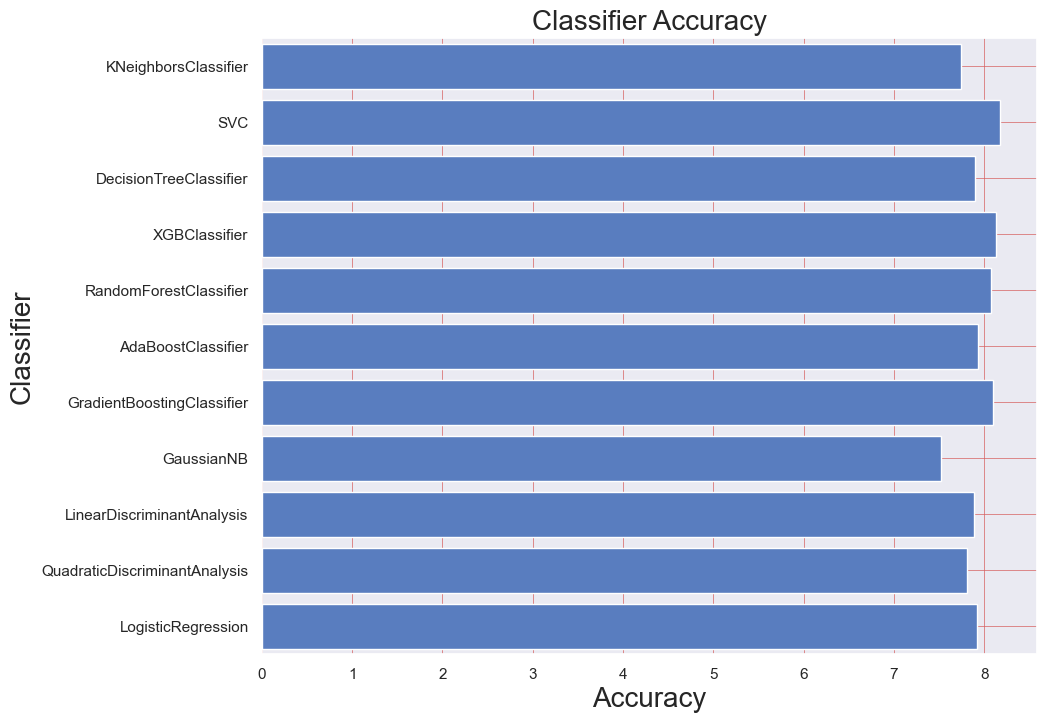

In [232]:
log['Classifier']=acc_dict.keys()
log['Accuracy']=acc_dict.values()
log.set_index([[0,1,2,3,4,5,6,7,8,9,10]])
%matplotlib inline
sns.set_color_codes("muted")
ax=plt.subplots(figsize=(10,8))
ax=sns.barplot(y='Classifier',x='Accuracy',data=log,color='b')
ax.set_xlabel('Accuracy',fontsize=20)
plt.ylabel('Classifier',fontsize=20)
plt.grid(color='r', linestyle='-', linewidth=0.5)
plt.title('Classifier Accuracy',fontsize=20)


From the above barplot, we can clearly see that the accuracy of the SVC classifier is best out of all other classifiers..

Lets apply this to our test data.

<h2>Prediction</h2>

Lets use the SVC classifier to predict our data.

In [233]:
train.head()

,Survived,Pclass,SibSp,Parch,Fare,Age2,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,0,3,1,0,0,1,1,False,True
2,1,1,1,0,3,2,0,False,False
3,1,3,0,0,0,1,0,False,True
4,1,1,1,0,3,2,0,False,True
5,0,3,0,0,1,2,1,False,True


In [234]:
classifier=SVC()
xtrain=train.iloc[:,1:]
ytrain=train.iloc[:,:1]
ytrain=ytrain.values.ravel()
classifier.fit(xtrain,ytrain)
#we need to convert the test data 

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [235]:
# Impute Age and Fare before dropping columns
imp_age = SimpleImputer(strategy="most_frequent")
test['Age1'] = imp_age.fit_transform(test[['Age']])

imp_fare = SimpleImputer(strategy="most_frequent")
test['Fare2'] = imp_fare.fit_transform(test[['Fare']])

# Now drop the original columns
test.drop(['Name', 'Cabin', 'Age', 'Ticket', 'Fare'], axis=1, inplace=True)

test.set_index('PassengerId', inplace=True)
#test[test.Fare.isnull()]#this will tell us which row have null so we can drop that particular row.
#test.drop([1044],axis=0,inplace=True)#drop the row which NaN .
#test.isnull().sum()

In [236]:
## get dummy variables for Column sex and embarked since they are categorical value.
if "Sex" in test.columns:
    test = pd.get_dummies(test, columns=['Sex'], drop_first=True)

if "Embarked" in test.columns:
    test = pd.get_dummies(test, columns=['Embarked'], drop_first=True)


#Mapping the data.
test['Fare2'] = test['Fare2'].astype(int)
test.loc[test.Fare2<=7.91,'Fare2']=0
test.loc[(test.Fare2>7.91) &(test.Fare2<=14.454),'Fare2']=1
test.loc[(test.Fare2>14.454)&(test.Fare2<=31),'Fare2']=2
test.loc[(test.Fare2>31),'Fare2']=3

test['Age1']=test['Age1'].astype(int)
test.loc[ test['Age1'] <= 16, 'Age1']= 0
test.loc[(test['Age1'] > 16) & (test['Age1'] <= 32), 'Age1'] = 1
test.loc[(test['Age1'] > 32) & (test['Age1'] <= 48), 'Age1'] = 2
test.loc[(test['Age1'] > 48) & (test['Age1'] <= 64), 'Age1'] = 3
test.loc[test['Age1'] > 64, 'Age1'] = 4

<h2>Result</h2>

The final result is

In [237]:
# Rename columns to match training data
test_fixed = test.rename(columns={'Age1': 'Age2', 'Fare2': 'Fare'})

# Ensure column order matches training data
test_fixed = test_fixed[['Pclass', 'SibSp', 'Parch', 'Fare', 'Age2', 'Sex_male', 'Embarked_Q', 'Embarked_S']]

Result = classifier.predict(test_fixed)
print(Result)
print(len(Result))

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]
418


In [239]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

clf = SVC(probability=True, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Validation Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Validation Accuracy: 0.7686567164179104
Confusion Matrix:
 [[143  22]
 [ 40  63]]


In [241]:
test_predictions = clf.predict(test_fixed)
print("Predictions:", test_predictions[:20])

Predictions: [0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1]


In [243]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd

# =====================
# 1. Prepare Data
# =====================
X = train.drop('Survived', axis=1)
y = train['Survived'].astype(int)

# Split into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# =====================
# 2. Train Classifier
# =====================
clf = SVC(probability=True, random_state=42)
clf.fit(X_train, y_train)

# =====================
# 3. Validate
# =====================
y_pred = clf.predict(X_valid)
print("✅ Validation Accuracy:", accuracy_score(y_valid, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_valid, y_pred))

# =====================
# 4. Predict on Test
# =====================
test_predictions = clf.predict(test_fixed)
print("🔮 First 20 predictions:", test_predictions[:20])
print("Total predictions:", len(test_predictions))

# =====================
# 5. Save Submission
# =====================
output = pd.DataFrame({
    "PassengerId": test.index,
    "Survived": test_predictions
})
output.to_csv("submission.csv", index=False)
print("💾 Saved submission.csv")

✅ Validation Accuracy: 0.8156424581005587
Confusion Matrix:
 [[92 13]
 [20 54]]
🔮 First 20 predictions: [0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1]
Total predictions: 418
💾 Saved submission.csv


In [249]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=200, random_state=42)


In [250]:
from sklearn.model_selection import GridSearchCV
param_grid = {"n_estimators": [100, 200, 500], "max_depth": [3, 5, 10]}
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best Params:", grid.best_params_)


Best Params: {'max_depth': 5, 'n_estimators': 100}


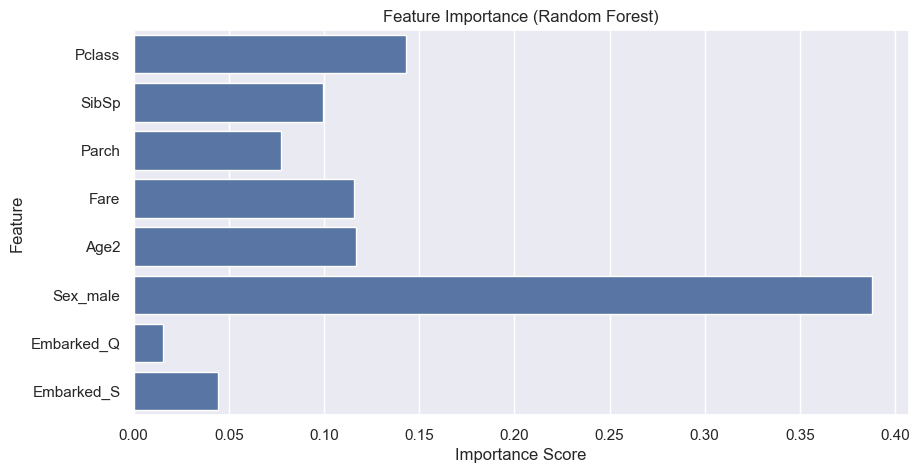

In [253]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Train RandomForest (model2)
model2 = RandomForestClassifier(n_estimators=200, random_state=42)
model2.fit(X_train, y_train)

# Feature importance
feature_importance = pd.Series(model2.feature_importances_, index=X.columns)

plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


In [254]:
from sklearn.ensemble import VotingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

model1 = LogisticRegression()
model2 = RandomForestClassifier(n_estimators=200, random_state=42)
model3 = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

ensemble = VotingClassifier(estimators=[
    ('lr', model1), ('rf', model2), ('xgb', model3)
], voting='soft')

ensemble.fit(X_train, y_train)
print("Ensemble Accuracy:", ensemble.score(X_valid, y_valid))


Ensemble Accuracy: 0.7988826815642458


C:\Users\Aritra Kundu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [11:15:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Text(0.5, 1.0, 'Survival Rate by Passenger Class')

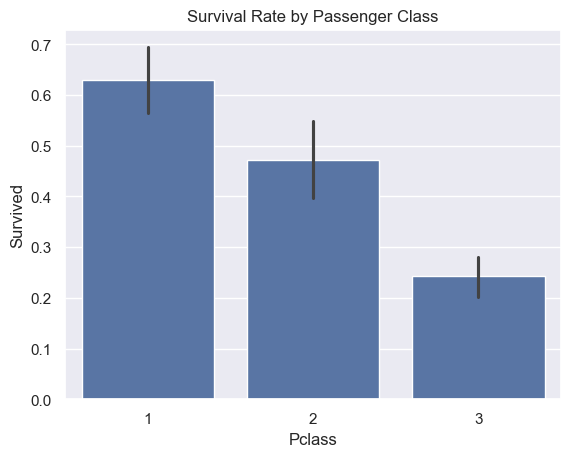

In [255]:
sns.barplot(x="Pclass", y="Survived", data=train)
plt.title("Survival Rate by Passenger Class")
